**CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING (SUPERVISED LEARNING : K-NN ALGORITHM)**

#Importing the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import time
import warnings

from matplotlib import pyplot as plt
import seaborn as sns
import time 
%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
import joblib

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

DATA PRE-PROCESSING

#Read the Data

In [7]:
import pandas as pd
 
#Data Preprocessing
df = pd.read_csv('creditcard.csv')
 
# display dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

DATA PREPARATION

#Describe Data

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.shape

(284807, 31)

DATA CLEANING

#Checking for missing values

In [11]:
df.isnull().any().sum()

0

#Observe the different feature type present in the data

In [12]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

#Checking the Percentage of frauds before moving forward

In [14]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')
print(len(fraud))

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %
492


#Create a bar plot of fraudulent vs non-fraudulent transcations

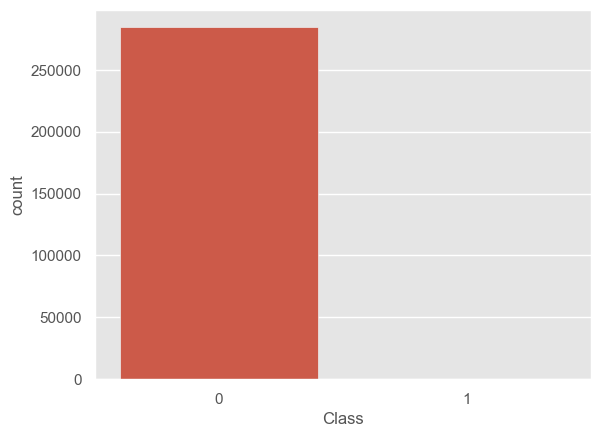

In [15]:
sns.countplot(x='Class',data=df)

plt.show()

In [17]:
df = pd.read_csv('creditcard.csv')
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


EXPLORATORY DATA ANALYSIS:

#Checking the distribution of amount

<Axes: xlabel='Amount', ylabel='Density'>

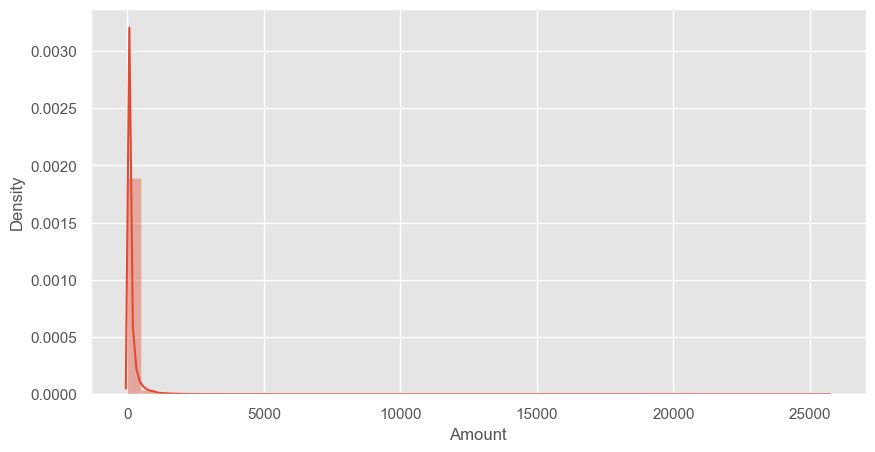

In [19]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('creditcard.csv')
 

plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

#Checking the distribution of time

<Axes: ylabel='Density'>

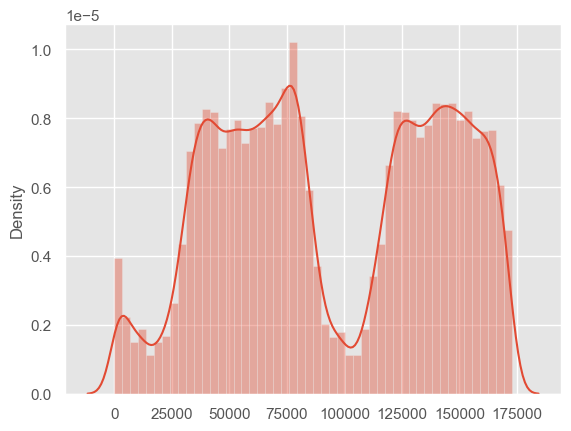

In [20]:
time = [df['Time'].values]
sns.distplot(time)

#Distribution of anomalous features

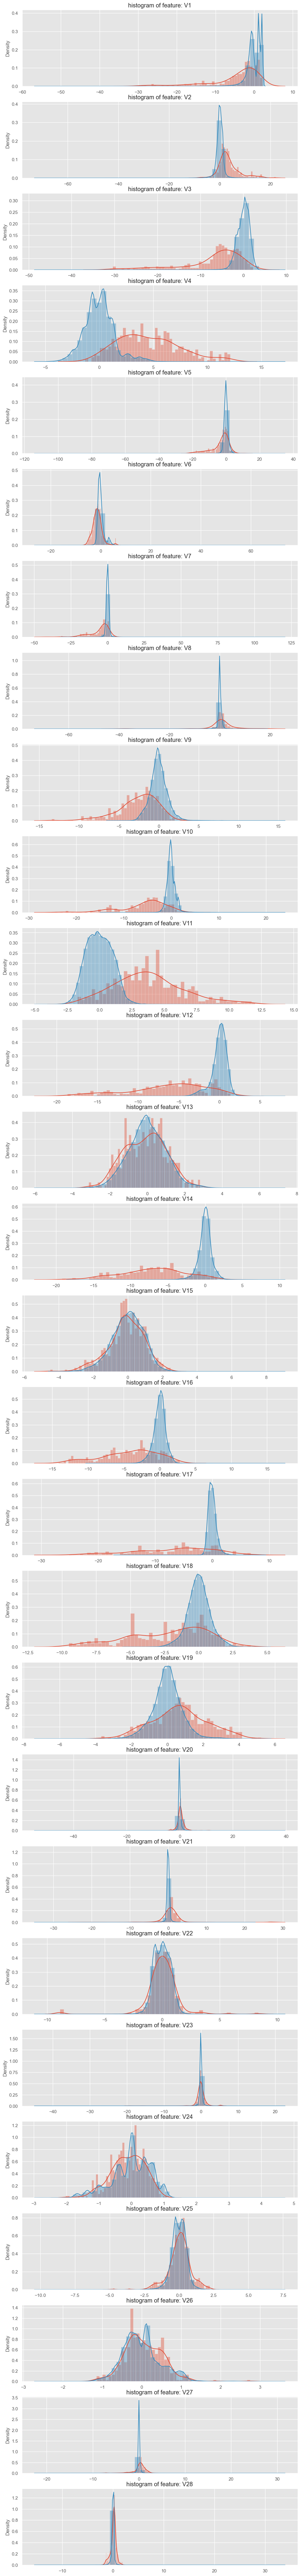

In [21]:
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

STANDARDISING THE DATA

#Standardizing the features

In [22]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


DATA REDUCTION AND DATA TRANSFORMATION

#PCA transformation:
 
 
 PCA (Principal Component Analysis) mainly using to reduce the size of the feature space while retaining as much of the information as possible. In here all the features transformed into 2 features using PCA.

In [23]:
df = pd.read_csv('creditcard.csv')
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,94813.862881,55.979467,0
1,94813.854640,-90.953660,0
2,94812.875662,285.024840,0
3,94812.861396,29.859853,0
4,94811.858408,-23.652028,0


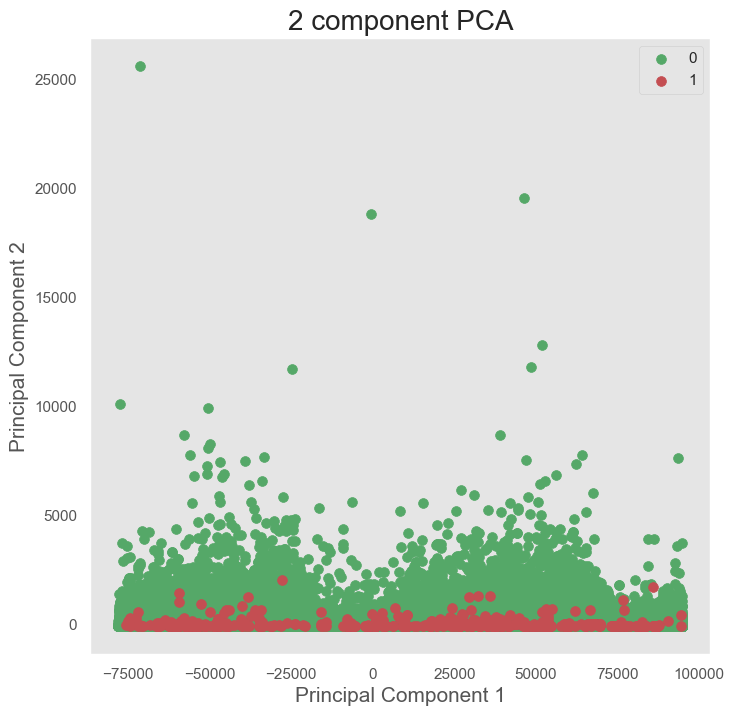

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'], finalDf.loc[indicesToKeep,'principal component 2'], c = color, s = 50)
   
ax.legend(targets)
ax.grid()

#pairplot_data_grid

In [25]:
def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''
    plt.figure(figsize=(15,15))
    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()
        

<Figure size 1500x1500 with 0 Axes>

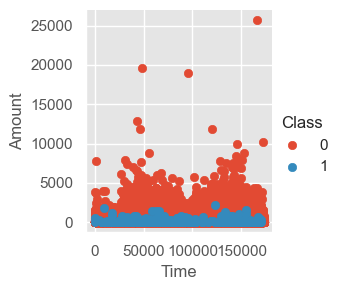

In [26]:
pairplot_data_grid(df, "Time", "Amount", "Class")

Hence, we observe that the 99.85% of transactions amount to less than 2500. Let us see how many of these are fraud and others legitimate

Scatter plotting

#Create a scatter plot to observe the distribution of classes with time

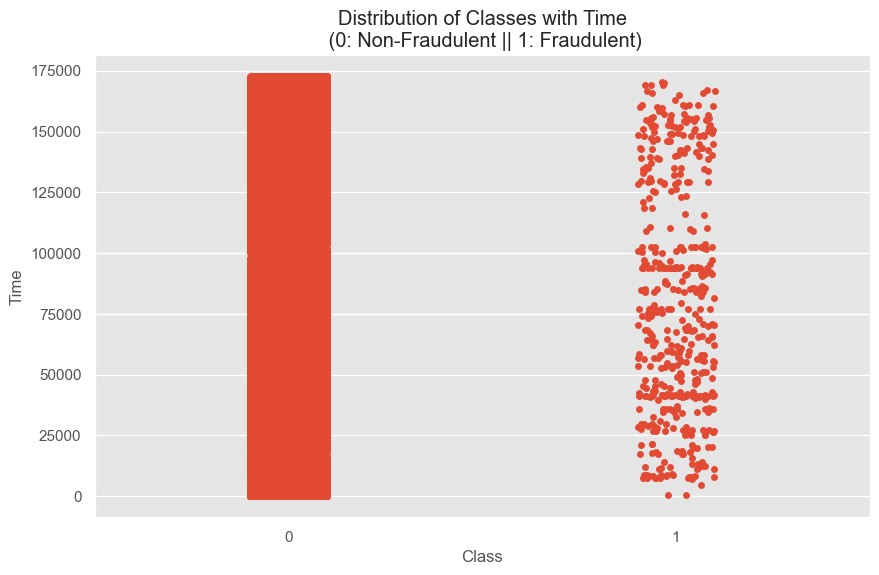

In [27]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

#Create a scatter plot to observe the distribution of classes with Amount

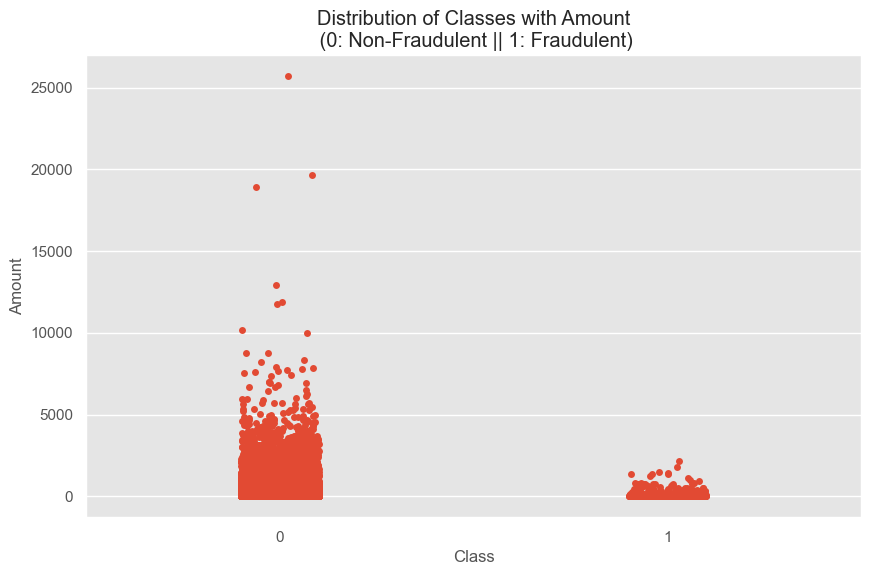

In [28]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

#Heat map of correlation of features

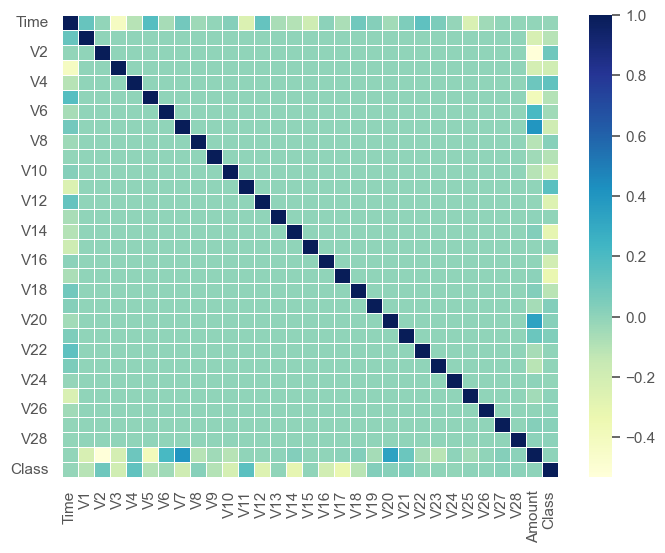

In [29]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

Thus, we can conclude that since the number of fraud transaction below the amount of 2500 is same as the number of total fraud transactions. Hence, all fraud transactions are less than 2500

In [31]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

449
284358


In [32]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

In [33]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print("FRAUD:",fraud)
print("NON FRAUD:",legitimate)

FRAUD: 492
NON FRAUD: 283867


Text(0, 0.5, 'Frequency')

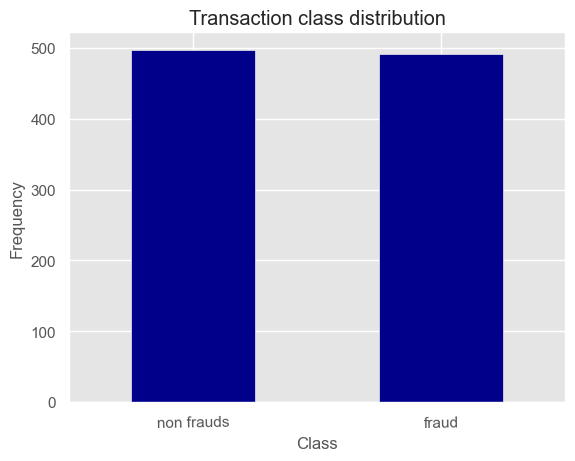

In [34]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:497]

new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=45)

labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)


classes.plot(kind = 'bar', rot=1,color = 'darkblue')

plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

#Applying Machine Learning Algorithms

#Breaking the dataset into training and testing

DATA MINING AND SPLITTING

#Knn classification

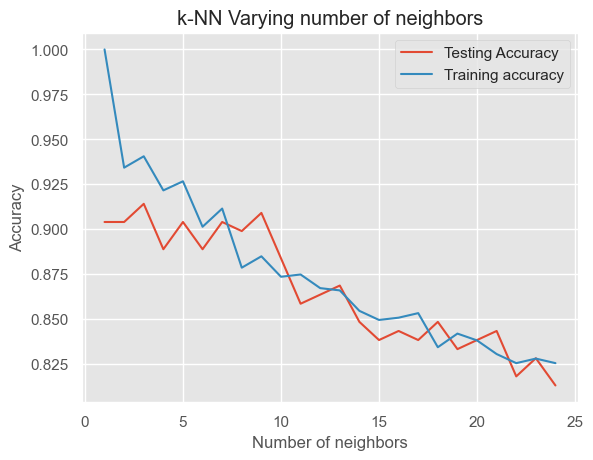

In [36]:
df = pd.read_csv('creditcard.csv')
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

#train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)

neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

#KNeighborsClassification
for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#blob representation

Text(0.5, 1.0, ' Number of Blobs')

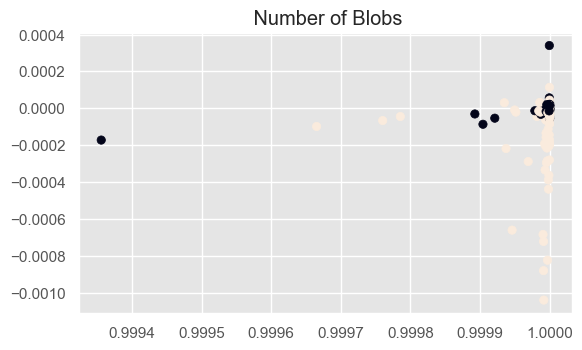

In [37]:
import numpy as np
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

knn_predicted_test_labels=knn.predict(X_test)
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

#score knn

In [38]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)

In [39]:
print(knn_accuracy_score)

0.9141414141414141


In [40]:
print(knn_f1_score)

0.914572864321608


In [41]:
print(knn_precison_score)

0.9285714285714286


In [42]:
print(knn_recall_score)

0.900990099009901


In [43]:
print(knn_MCC)

0.8286982798536249


In [44]:
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9141414141414141

#printing

In [45]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9141414141414141
Precison --> 0.9285714285714286
Recall --> 0.900990099009901
F1 --> 0.914572864321608
MCC --> 0.8286982798536249
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.93      0.90      0.91       101

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



#Confusion matrix representation

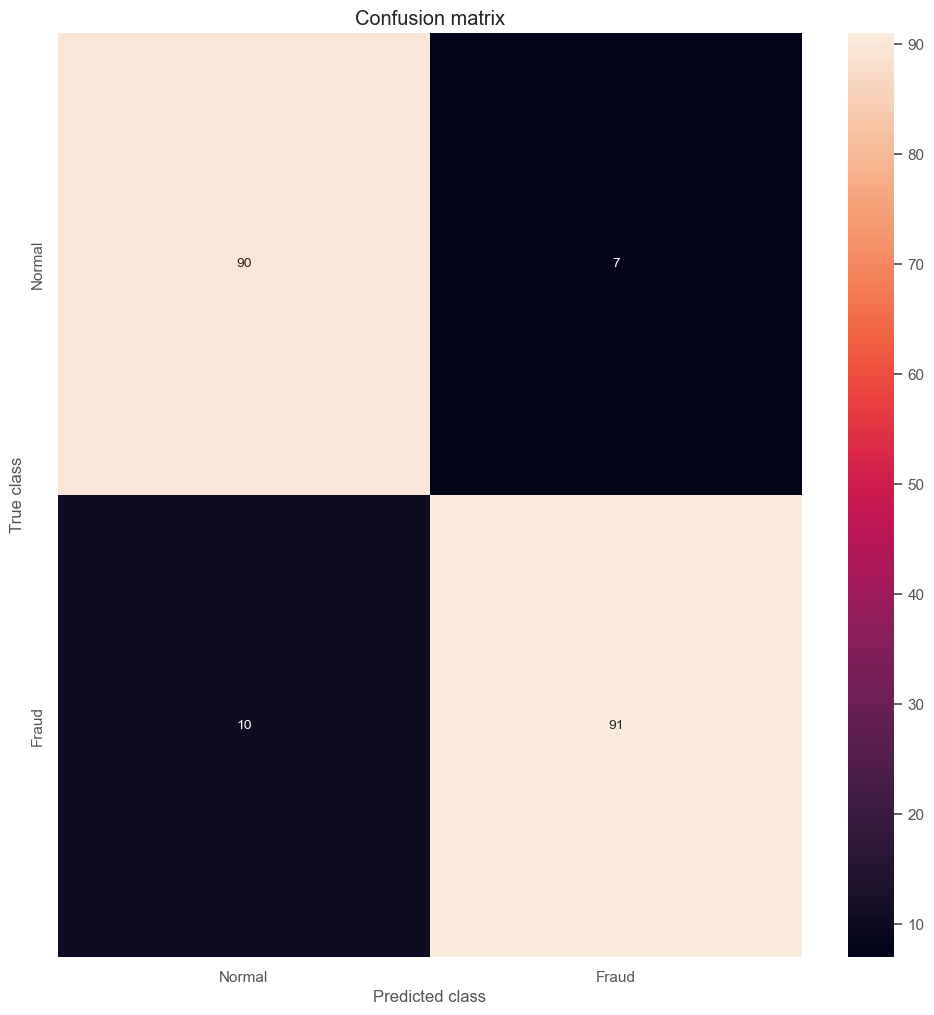

In [46]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Compare algorithms

In [48]:
#Compare Algorithms
##Spot-Checking Algorithms

models = []


models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


KNN: 0.934948 (0.024720)
SVM: 0.631775 (0.114101)
CART: 0.887969 (0.035992)


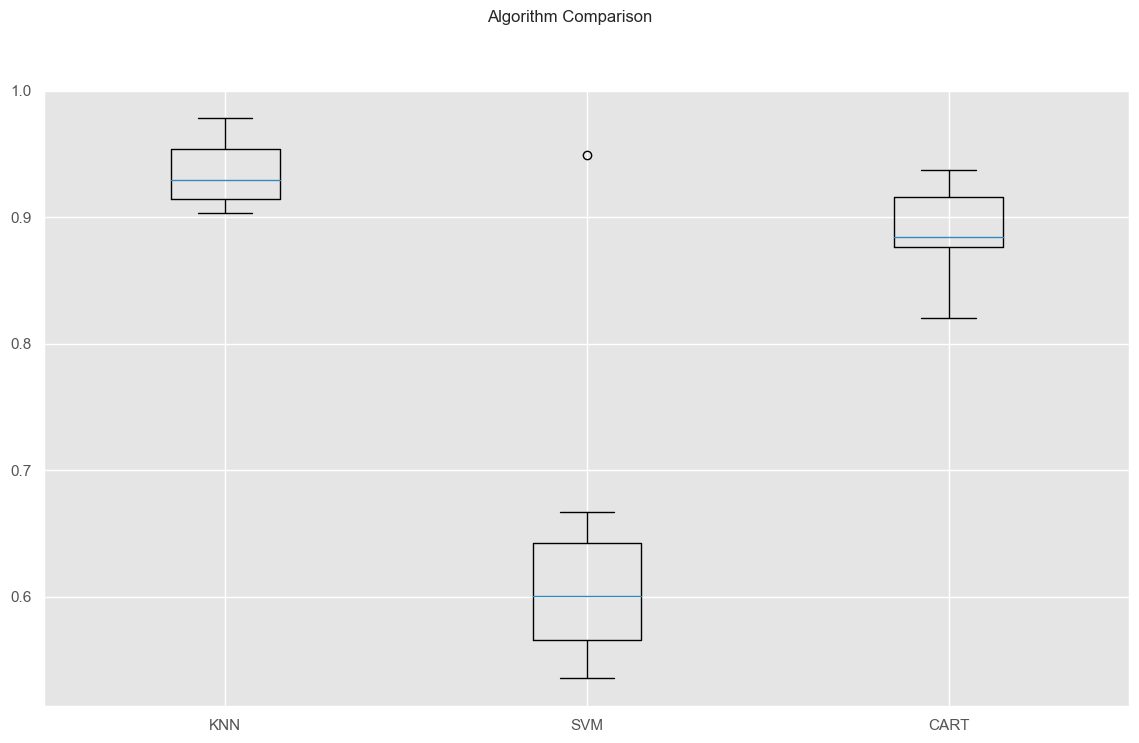

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Summary:


1.All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.
2.The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with commiting of fraud.
3.The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.

Conclusion:

1.KNN ALGORITHM PERFORMS BETTER THAN SVM AND DECISION TREE ALGORITHM(ACCURACY IS HIGH)

2.IT HAS HIGH ACCURACY RATE TO FIND THE FRAUDULENT FROM THE NON-FRAUDULENT IN THE GIVEN DATASET

3.THUS FRAUD DETECTION IS COMPLETED BY USING KNN ALGORITHM